In [41]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [92]:
from pandas_datareader import DataReader
from datetime import datetime

df = DataReader('ADBE',  'yahoo', datetime(2018,1,1), datetime(2021,4,1))

In [93]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,177.800003,175.259995,175.850006,177.699997,2432800,177.699997
2018-01-03,181.889999,177.699997,178.000000,181.039993,2561200,181.039993
2018-01-04,184.059998,181.639999,181.929993,183.220001,2211400,183.220001
2018-01-05,185.899994,183.539993,185.000000,185.339996,2376500,185.339996
2018-01-08,185.600006,183.830002,184.949997,185.039993,2088000,185.039993
...,...,...,...,...,...,...
2021-03-26,469.769989,449.049988,450.250000,469.089996,3614400,469.089996
2021-03-29,472.000000,462.500000,469.029999,469.320007,3141900,469.320007
2021-03-30,469.089996,461.500000,462.579987,465.459991,2436300,465.459991


In [94]:
df1 = df["Adj Close"]

In [95]:
df1.shape

(818,)

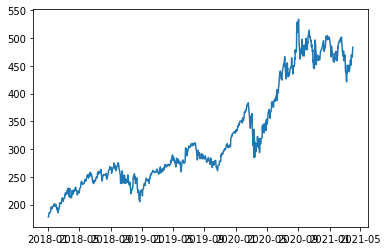

In [96]:
plt.plot(df1)

In [97]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [98]:
print(df1)

[[0.        ]
 [0.00937938]
 [0.01550128]
 [0.02145465]
 [0.02061218]
 [0.0252738 ]
 [0.02642517]
 [0.03150801]
 [0.04872229]
 [0.04144906]
 [0.0527661 ]
 [0.0519517 ]
 [0.05063184]
 [0.05655715]
 [0.0628756 ]
 [0.05638866]
 [0.05563044]
 [0.06627354]
 [0.05765234]
 [0.05391743]
 [0.06194889]
 [0.0608818 ]
 [0.05037912]
 [0.03529909]
 [0.04709353]
 [0.04111205]
 [0.02094919]
 [0.0288964 ]
 [0.04057848]
 [0.04431339]
 [0.05456335]
 [0.07096323]
 [0.06700365]
 [0.07099129]
 [0.068492  ]
 [0.06995227]
 [0.08997475]
 [0.09674248]
 [0.08739121]
 [0.08826175]
 [0.07955631]
 [0.09011513]
 [0.09396239]
 [0.09634934]
 [0.10996912]
 [0.10867733]
 [0.12190397]
 [0.12142658]
 [0.11811289]
 [0.11440608]
 [0.11561359]
 [0.13437239]
 [0.12490872]
 [0.14616682]
 [0.13802306]
 [0.12024715]
 [0.10480205]
 [0.14380794]
 [0.10137604]
 [0.09783768]
 [0.10777873]
 [0.09710756]
 [0.10735747]
 [0.13296829]
 [0.12872788]
 [0.11488347]
 [0.11645606]
 [0.13150801]
 [0.12898065]
 [0.13833196]
 [0.13018815]
 [0.13

In [99]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [91]:
len(train_data), len(test_data)

(1022, 551)

In [116]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=15):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)


In [117]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [118]:
print(X_train.shape), print(y_train.shape)


(430, 100)
(430,)


(None, None)

In [119]:
print(X_test.shape), print(ytest.shape)

(186, 100)
(186,)


(None, None)

In [120]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [121]:

### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [122]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [123]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [124]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Train on 430 samples, validate on 186 samples
Epoch 1/100
430/430 [==============================] - 1s 2ms/sample - loss: 0.0332 - val_loss: 0.0054


C:\Users\adhar\anaconda3\envs\tf_gpu\lib\site-packages\tensorflow\python\keras\engine\training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Epoch 2/100
430/430 [==============================] - 0s 1ms/sample - loss: 0.0069 - val_loss: 0.1489
Epoch 3/100
430/430 [==============================] - 0s 1ms/sample - loss: 0.0049 - val_loss: 0.0744
Epoch 4/100
430/430 [==============================] - 0s 1ms/sample - loss: 0.0032 - val_loss: 0.0493
Epoch 5/100
430/430 [==============================] - 0s 1ms/sample - loss: 0.0023 - val_loss: 0.0772
Epoch 6/100
430/430 [==============================] - 0s 1ms/sample - loss: 0.0021 - val_loss: 0.0298
Epoch 7/100
430/430 [==============================] - 0s 1ms/sample - loss: 0.0018 - val_loss: 0.0291
Epoch 8/100
430/430 [==============================] - 1s 1ms/sample - loss: 0.0015 - val_loss: 0.0126
Epoch 9/100
430/430 [==============================] - 1s 3ms/sample - loss: 0.0012 - val_loss: 0.0050
Epoch 10/100
430/430 [==============================] - 1s 3ms/sample - loss: 9.8816e-04 - val_loss: 0.0040
Epoch 11/100
430/430 [==============================] - 1s 2ms/sampl

430/430 [==============================] - 0s 1ms/sample - loss: 5.0959e-04 - val_loss: 0.0248
Epoch 79/100
430/430 [==============================] - 1s 1ms/sample - loss: 5.1100e-04 - val_loss: 0.0219
Epoch 80/100
430/430 [==============================] - 0s 1ms/sample - loss: 4.8818e-04 - val_loss: 0.0184
Epoch 81/100
430/430 [==============================] - 0s 1ms/sample - loss: 5.0447e-04 - val_loss: 0.0264
Epoch 82/100
430/430 [==============================] - 1s 1ms/sample - loss: 5.1367e-04 - val_loss: 0.0258
Epoch 83/100
430/430 [==============================] - 1s 1ms/sample - loss: 5.3402e-04 - val_loss: 0.0245
Epoch 84/100
430/430 [==============================] - 1s 2ms/sample - loss: 5.1412e-04 - val_loss: 0.0102
Epoch 85/100
430/430 [==============================] - 1s 2ms/sample - loss: 4.9632e-04 - val_loss: 0.0109
Epoch 86/100
430/430 [==============================] - 1s 1ms/sample - loss: 4.7298e-04 - val_loss: 0.0161
Epoch 87/100
430/430 [===================

In [110]:
import tensorflow as tf

In [111]:
tf.__version__

'2.4.1'

In [125]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [126]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [127]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

272.3730251556096

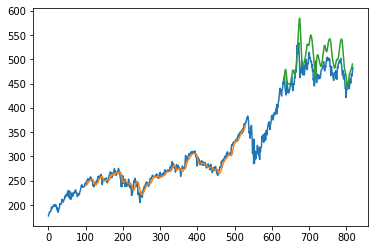

In [131]:

### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()